# Einschrittverfahren (Blatt 1, Aufgabe 4)

## Einführung
Die Lösung des Anfangswertproblems
$$
 \dot{u}(t)=\cos(\frac{5}{3}t+1)+\frac{1}{2}u(t)+\frac{1}{2},\quad x(0)=-1/2
$$
soll mit numerischen Methoden bestimmt werden. Die rechte Seite der DGL sowie den Anfangwert definieren wir hier:

In [3]:
function udot=myrhs(u, t)  
  udot = cos(5/3*t+1) +0.5 * u + 0.5;
endfunction

In [4]:
u0 = [-0.5];

Nun soll die Lösung des Anfangswertproblems dargestellt werden. Dazuz benutzen wir ´´lsode'

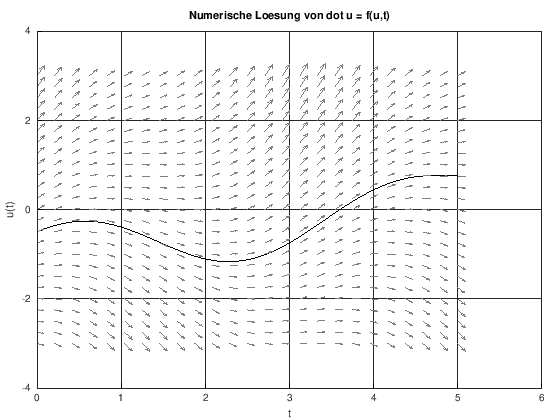

In [3]:
% plot gnuplot
% addpath("../../basics")

% Berechne Referenzloesung (mit lsode)
tref = linspace(0.0, 5.0, 50);
uref = lsode(@myrhs, u0, tref);

% Darstellung des Richtungsfeld (25x25)
newplot()
hold on

title("Numerische Loesung von \dot u = f(u,t)")
xlabel("t")
ylabel("u(t)")
grid on

plot(tref, uref(:,1), 'color', 'black')
plot_richtungsfeld_1d(@myrhs, (t=linspace(0, 5, 25)), u=linspace(-3, 3, 25))

## Definition der Einschrittverfahren
Hier beginnt jetzt für Sie die Arbeit. Bitte implemtieren Sie die nachfolgenden Funktionen:

In [7]:
%% Das explizite Eulerverfahren ist bereits vorgegeben ;-). 
function ueulerT=euler_explicit(f, u0, tvec)
    
    % Initialisierung.
    ueulerT=zeros(length(tvec), size(u0));
    ueulerT(1,:) = u0';
    
    % Zeitschritte. 
    for i=2:length(tvec)
    
        # Zeitschrittweite.
        tau = tvec(i) - tvec(i-1);
        
        % Letzter Zeitpunkt und Wert.
        tlast = tvec(i-1);
        ulast = ueulerT(i-1,:)(:); % Spaltenvektor
        
        % Wert im naechsten Zeitpunkt.
        ueulerT(i,:) = ulast + tau*f(ulast, tlast);
    end
endfunction

In [20]:
%% TODO: Die nachfolgenden Verfahren sind zu implementieren. Bitte fuegen Sie hier eigenen Code ein.

% Heun-Verfahren (explizit)
function uheunT=heun_explicit(f, u0, tvec)
    
    % Initialisierung.
    uheunT=zeros(length(tvec), size(u0));
    uheunT(1,:) = u0';
    
    % Zeitschritte. 
    for i=2:length(tvec)
       % TODO: ...
    end
endfunction

% Runge-Kutta 4 (explizit)
function urk4T=rk4_explicit(f, u0, tvec)
     % TODO: ...
endfunction


% Euler (implizit). 
function ueulerT=euler_implicit(f, u0, tvec)
     % TODO: ...
     % ACHTUNG: Diese Funktion ist schwierig, da ein Gleichungssystem geloest werden muss. 
     % Verwenden Sie hierzu z.B. die Funktion "fsolve" (s. help fsolve). Diese findet Nullstellen einer gegebenen Funktion.
     % Um "fsolve" zu verwenden, muessen Sie daher ggf. innerhalb von "euler_implicit" eine weitere Funktion mit der Defektgleichung implementieren.
endfunction


## Test 1: Sind die Funktionen vorhanden?
Ja, klar!

In [4]:
% addpath("../../basics")

exist("euler_explicit")
exist("euler_implicit")
exist("heun_explicit")
exist("rk4_explicit")

ans =  2
ans =  2
ans =  2
ans =  2


## Test 2: Erzeuge numerische Lösungen

In [5]:
% A) Numerische Loesungen 
NSteps  = 5
tdiskret = linspace(0.0, 5.0, NSteps + 1)

NSteps =  5
tdiskret =

   0   1   2   3   4   5



### a) Expliziter Euler

In [6]:
# TODO: Entfernen Sie das Semikolon, um Ausgaben sichtbar zu machen.
yeuler = euler_explicit(@myrhs, u0, tdiskret);

### b) Impliziter Euler

In [7]:
# TODO: Entfernen Sie das Semikolon, um Ausgaben sichtbar zu machen.
yeuler2 = euler_implicit(@myrhs, u0, tdiskret);

### c) Heun

In [8]:
# TODO: Entfernen Sie das Semikolon, um Ausgaben sichtbar zu machen.
yheun = heun_explicit(@myrhs, u0, tdiskret);

### d) RK4 explizit

In [9]:
# TODO: Entfernen Sie das Semikolon, um Ausgaben sichtbar zu machen.
yrk4 = rk4_explicit(@myrhs, u0, tdiskret);

## Test 3: Gemeinsamer Plot aller Lösungen

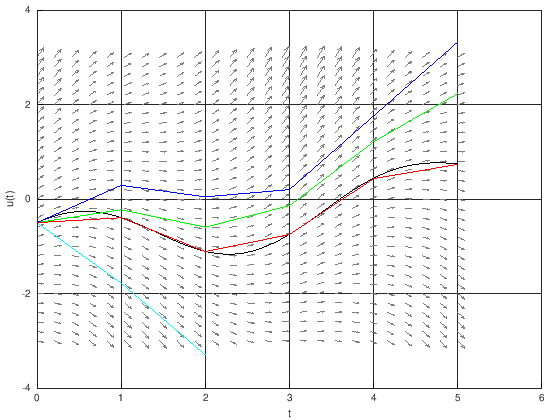

In [10]:
%plot inline
% Plot von Richtungsfeld und Referenzlösung
newplot()
hold on
xlabel('t')
ylabel('u(t)')
grid on
plot_richtungsfeld_1d(@myrhs, (t=linspace(0, 5, 25)), u=linspace(-3, 3, 31))
plot(tref, uref(:,1), 'color', 'black')

% Eigene Loesungen 
% TODO: Bitte ggf. ein-/auskommentieren!
plot(tdiskret, yeuler(:,1), 'color', 'blue')
plot(tdiskret(1:3), yeuler2(1:3,1), 'color', 'cyan')
plot(tdiskret, yheun(:,1), 'color', 'green')
plot(tdiskret, yrk4, 'color', 'red')


In [11]:
help fsolve

'fsolve' is a function from the file /opt/local/share/octave/5.1.0/m/optimization/fsolve.m

 -- fsolve (FCN, X0)
 -- fsolve (FCN, X0, OPTIONS)
 -- [X, FVAL, INFO, OUTPUT, FJAC] = fsolve (...)
     Solve a system of nonlinear equations defined by the function FCN.

     FCN should accept a vector (array) defining the unknown variables,
     and return a vector of left-hand sides of the equations.
     Right-hand sides are defined to be zeros.  In other words, this
     function attempts to determine a vector X such that 'FCN (X)' gives
     (approximately) all zeros.

     X0 is an initial guess for the solution.  The shape of X0 is
     preserved in all calls to FCN, but otherwise is treated as a column
     vector.

     OPTIONS is a structure specifying additional parameters which
     control the algorithm.  Currently, 'fsolve' recognizes these
     options: "AutoScaling", "ComplexEqn", "FinDiffType", "FunValCheck",
     "Jacobian", "MaxFunEvals", "MaxIter", "OutputFcn", "TolFun",
 